# Alt-chain temporal study
## Monero Archival Project

IsthmusCrypto 2018.07

Here, alt-chain ("block1") data is compared against main-chain.

Specifically, we note patterns in times between subsequent blocks.

Objectives:
-  What does the timing suggest regarding alternate chains
-  If consistent timing within a given side chain, estimate hashpower
-  If consistent timing across side chains, suggests single player
-  Check to see if the hashpower sunk into side chains disappears from main chain

## Import libraries

In [1]:
import pandas as pd
from copy import copy
import datetime
import numpy as np
import matplotlib.pyplot as plt

## Where are files saved?

In [2]:
block0s_relative_path = 'altchain_logs/block0s.txt'
block1s_relative_path = 'altchain_logs/block1s.txt'

## Import files

In [3]:
b0s_raw = pd.read_csv(block0s_relative_path)
b1s_raw = pd.read_csv(block1s_relative_path)

# Modify this version:
b0s = copy(b0s_raw)
b1s = copy(b1s_raw)

b0s = b0s.sort_values('block_height')
b1s = b1s.sort_values('block_height')

pass

### Sneak a peek at the data

Typically, see duplicates.

b0, or b1. Here, b1

In [4]:
print(type(b1s_raw))
b1s_raw[0:20]

<class 'pandas.core.frame.DataFrame'>


,block_time,block_height,block_nonce,block_random
0,1522901487,1545098,2684357998,11314
1,1522901487,1545098,2684357998,11935
2,1522901487,1545098,2684357998,14423
3,1522901487,1545098,2684357998,16546
4,1522901487,1545098,2684357998,16865
5,1522901487,1545098,2684357998,17566
6,1522901487,1545098,2684357998,19975
7,1522901487,1545098,2684357998,24988
8,1522901487,1545098,2684357998,27186
9,1522901487,1545098,2684357998,27796


## De-duplicate

In [5]:
b0s.drop(['block_random'],1,inplace=True)
b0s=b0s.drop_duplicates()

b1s.drop(['block_random'],1,inplace=True)
b1s=b1s.drop_duplicates()
b1s[0:20]

,block_time,block_height,block_nonce
0,1522901487,1545098,2684357998
439,1523003051,1546000,570430823
648,1523337099,1547963,2139397
654,1525032170,1562061,3579158795
655,1525032261,1562062,2970728396
660,1525219207,1563626,668103
666,1525470502,1565690,589661
667,1525470534,1565691,358009781
678,1525470959,1565692,2863312291
679,1525472810,1565693,1073825901


## Generate differenece coulmns

In [6]:
b0s['delta_height'] = b0s['block_height']-b0s['block_height'].shift()
b0s['delta_time'] = b0s['block_time']-b0s['block_time'].shift()

b1s['delta_height'] = b1s['block_height']-b1s['block_height'].shift()
b1s['delta_time'] = b1s['block_time']-b1s['block_time'].shift()

## Drop rows with jumps (delta_height > 1)

In [7]:
b0s = b0s[b0s.delta_height == 1]
b1s = b1s[b1s.delta_height == 1]

## What are we left with?

In [8]:
print('Retained ' + str(len(b0s)) + ' main-chain blocks')
print('Retained ' + str(len(b1s)) + ' side-chain blocks')

Retained 17914 main-chain blocks
Retained 190 side-chain blocks


## Study block times

In [9]:
b0_mean_time_s = np.mean(b0s.delta_time)
b1_mean_time_s = np.mean(b1s.delta_time)

print('Main-chain blocks come with mean time: ' + str(round(b0_mean_time_s)) + ' seconds = ' + str(round(b0_mean_time_s/60,1)) + ' min')
print('Side-chain blocks come with mean time: ' + str(round(b1_mean_time_s)) + ' seconds = ' + str(round(b1_mean_time_s/60,1)) + ' min')

Main-chain blocks come with mean time: 120 seconds = 2.0 min
Side-chain blocks come with mean time: 6254 seconds = 104.2 min


### Visualize In terms of seconds

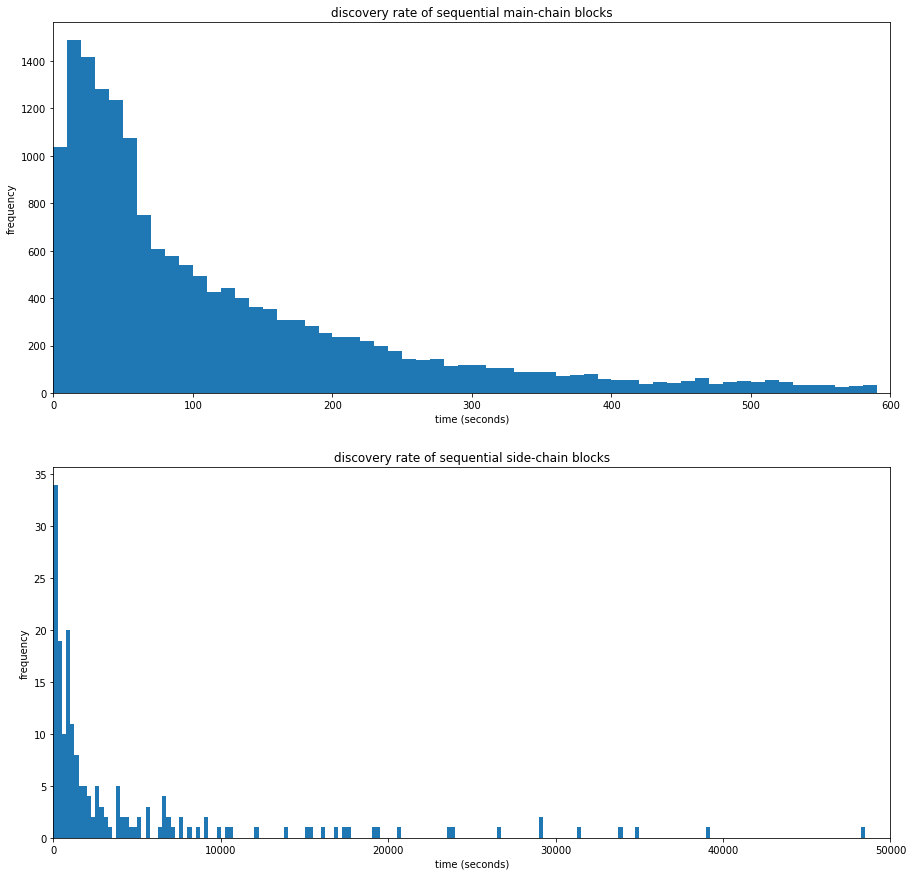

In [10]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('time (seconds)')
ax1.set_ylabel('frequency')
ax1.set_title('discovery rate of sequential main-chain blocks')
plt.hist(b0s.delta_time, bins=range(0,600,10))
ax1.set_xlim((0,600))
ax2 = fig.add_subplot(212)
plt.hist(b1s.delta_time, bins=range(0,50000,250))
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('frequency')
ax2.set_title('discovery rate of sequential side-chain blocks')
ax2.set_xlim((0,50000))
pass

## Plot discovery time as a function of length of side chain

Comparing temporal patterns among different side chains

In [11]:
b1s['side_chain_ID'] = 0
b1s['terminal_block']= 0 # is this the last block in the side-chain?
b1s['side_chain_length'] = b1s['block_height']-b1s['block_height'].shift() # how long did this side-chain get?
b1s['side_chain_time'] = 0

In [12]:
b1s = b1s.reset_index()
b1s.drop(['index','delta_height'], 1, inplace=True)
b1s.head()

,block_time,block_height,block_nonce,delta_time,side_chain_ID,terminal_block,side_chain_length,side_chain_time
0,1525032261,1562062,2970728396,91.0,0,0,NaN,0
1,1525470534,1565691,358009781,32.0,0,0,3629.0,0
2,1525470959,1565692,2863312291,425.0,0,0,1.0,0
3,1525472810,1565693,1073825901,1851.0,0,0,1.0,0
4,1525473108,1565694,20355,298.0,0,0,1.0,0


In [13]:
side_chain_counter = 0
for index, row in b1s.iterrows():
    
    this_row_val = b1s.side_chain_length[index]
    
    # print('index: ' + str(index) + ' this_row_val: ' + str(this_row_val))
    
    # Mark how far down this chain we've gotten
    if this_row_val > 1:
        # first block in the side-chain
        b1s.side_chain_length[index] = 1
        b1s.terminal_block[index-1] = 1
        side_chain_counter = side_chain_counter + 1 # increment the counter
        b1s.side_chain_ID[index] = side_chain_counter # mark the counter
    else:
        # subsequent block
        if index > 0:
            b1s.side_chain_length[index] = b1s.side_chain_length[index-1]+1
            delta_t_seconds = b1s.block_time[index] - b1s.block_time[index-1]
            b1s.side_chain_time[index] = b1s.side_chain_time[index-1] + delta_t_seconds
            b1s.side_chain_ID[index] = side_chain_counter

/home/m/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/m/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/m/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/m/anaconda3/lib/python3.6/site-packages/ipykernel_l

### Check out our new features

In [14]:
b1s

,block_time,block_height,block_nonce,delta_time,side_chain_ID,terminal_block,side_chain_length,side_chain_time
0,1525032261,1562062,2970728396,91.0,0,1,NaN,0
1,1525470534,1565691,358009781,32.0,1,0,1.0,0
2,1525470959,1565692,2863312291,425.0,1,0,2.0,425
3,1525472810,1565693,1073825901,1851.0,1,0,3.0,2276
4,1525473108,1565694,20355,298.0,1,0,4.0,2574
5,1525474474,1565695,4715644,1366.0,1,0,5.0,3940
6,1525474913,1565696,249376,439.0,1,0,6.0,4379
7,1525474950,1565697,2668814428,37.0,1,0,7.0,4416
8,1525475035,1565698,3095369266,85.0,1,0,8.0,4501
9,1525477756,1565699,693214,2721.0,1,0,9.0,7222
